Generating simulated image data...
Image data shape: (1000, 32, 32, 1)
Generating simulated sequential data (symptoms over time)...
Sequential data shape: (1000, 10, 5)
Generating simulated labels...
Labels shape: (1000,)

Data split complete:
Training Image data shape: (800, 32, 32, 1)
Testing Image data shape: (200, 32, 32, 1)
Training Sequential data shape: (800, 10, 5)
Testing Sequential data shape: (200, 10, 5)
Training Labels shape: (800, 3)
Testing Labels shape: (200, 3)

Building MedFusionNet hybrid model...

MedFusionNet model summary:


Model: "MedFusionNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        320 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_input    │ (None, 10, 5)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 4096)      │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     17,920 │ sequential_input… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 4160)      │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    532,608 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 3)         │        387 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 569,731 (2.17 MB)

 Trainable params: 569,731 (2.17 MB)

 Non-trainable params: 0 (0.00 B)


Training MedFusionNet...
Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.3579 - loss: 1.1371 - val_accuracy: 0.3500 - val_loss: 1.0980
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.3505 - loss: 1.0986 - val_accuracy: 0.3500 - val_loss: 1.0970
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.3594 - loss: 1.0962 - val_accuracy: 0.3500 - val_loss: 1.0952
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.4232 - loss: 1.0879 - val_accuracy: 0.3500 - val_loss: 1.0955
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3995 - loss: 1.0715 - val_accuracy: 0.3500 - val_loss: 1.1044
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4302 - loss: 1.0590 - val_accuracy: 0.3625 - val_loss: 1.0977
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6491 - loss: 0.9947 - val_accuracy: 0.3500 - val_loss: 1.1204
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5720 - loss: 0.905

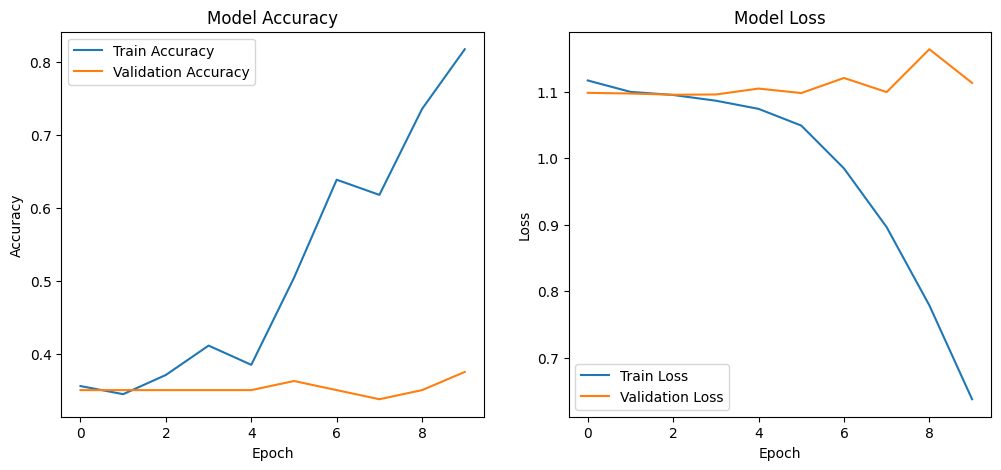


--- MedFusionNet Demonstration Complete ---
This example uses simulated data. For real applications, replace dummy data
with actual medical images and patient sequential data.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, concatenate, Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- 1. Data Generation (Simulated for Demonstration) ---
# In a real scenario, 'image_data' would be actual medical scans (e.g., X-rays, MRI)
# and 'sequential_data' would be patient symptom logs or vital signs over time.

num_samples = 1000
img_height, img_width, img_channels = 32, 32, 1 # Small grayscale images
seq_length, num_features_per_step = 10, 5 # 10 time steps, 5 features per step
num_classes = 3 # e.g., 'Healthy', 'Disease_A', 'Disease_B'

print("Generating simulated image data...")
# Simulate image data (e.g., simplified medical scans)
# Using random noise for simplicity. In reality, this would be loaded images.
image_data = np.random.rand(num_samples, img_height, img_width, img_channels).astype(np.float32)
print(f"Image data shape: {image_data.shape}")

print("Generating simulated sequential data (symptoms over time)...")
# Simulate sequential data (e.g., symptom progression over time)
sequential_data = np.random.rand(num_samples, seq_length, num_features_per_step).astype(np.float32)
print(f"Sequential data shape: {sequential_data.shape}")

print("Generating simulated labels...")
# Simulate target labels
labels = np.random.randint(0, num_classes, num_samples)
label_names = ['Healthy', 'Disease_A', 'Disease_B']
print(f"Labels shape: {labels.shape}")

# Convert integer labels to one-hot encoding for Keras
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

# --- 2. Data Splitting ---
# Split the combined data into training and testing sets
img_train, img_test, seq_train, seq_test, y_train, y_test = train_test_split(
    image_data, sequential_data, labels_one_hot, test_size=0.2, random_state=42, stratify=labels
)

print("\nData split complete:")
print(f"Training Image data shape: {img_train.shape}")
print(f"Testing Image data shape: {img_test.shape}")
print(f"Training Sequential data shape: {seq_train.shape}")
print(f"Testing Sequential data shape: {seq_test.shape}")
print(f"Training Labels shape: {y_train.shape}")
print(f"Testing Labels shape: {y_test.shape}")

# --- 3. Hybrid Model Architecture (MedFusionNet) ---
print("\nBuilding MedFusionNet hybrid model...")

# CNN Branch for Image Data
input_img = Input(shape=(img_height, img_width, img_channels), name='image_input')
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
flatten_img = Flatten()(pool2) # Output will be (batch_size, num_features_from_cnn)

# LSTM Branch for Sequential Data
input_seq = Input(shape=(seq_length, num_features_per_step), name='sequential_input')
lstm1 = LSTM(64, activation='relu')(input_seq) # Output will be (batch_size, num_features_from_lstm)

# Concatenate the outputs of both branches
merged = concatenate([flatten_img, lstm1])

# Fully Connected Layers for Classification
dense1 = Dense(128, activation='relu')(merged)
output = Dense(num_classes, activation='softmax')(dense1)

# Create the model with two inputs and one output
model = Model(inputs=[input_img, input_seq], outputs=output, name='MedFusionNet')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\nMedFusionNet model summary:")
model.summary()

# --- 4. Model Training ---
print("\nTraining MedFusionNet...")
history = model.fit(
    [img_train, seq_train], y_train,
    epochs=10, # Reduced epochs for faster demonstration
    batch_size=32,
    validation_split=0.1, # Use a small validation split from training data
    verbose=1
)

# --- 5. Model Evaluation ---
print("\nEvaluating MedFusionNet on test data...")
loss, accuracy = model.evaluate([img_test, seq_test], y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Generate predictions
y_pred_probs = model.predict([img_test, seq_test])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_names))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n--- MedFusionNet Demonstration Complete ---")
print("This example uses simulated data. For real applications, replace dummy data")
print("with actual medical images and patient sequential data.")